# Cars
* Examine the data
* Examine the types
* Output dimensions

In [20]:
head(mtcars)

sapply(mtcars, class)
dim(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.00,6.00,160.00,110.00,3.90,2.62,16.46,0.00,1.00,4.00,4.00
Mazda RX4 Wag,21.000,6.000,160.000,110.000,3.900,2.875,17.020,0.000,1.000,4.000,4.000
Datsun 710,22.80,4.00,108.00,93.00,3.85,2.32,18.61,1.00,1.00,4.00,1.00
Hornet 4 Drive,21.400,6.000,258.000,110.000,3.080,3.215,19.440,1.000,0.000,3.000,1.000
Hornet Sportabout,18.70,8.00,360.00,175.00,3.15,3.44,17.02,0.00,0.00,3.00,2.00
Valiant,18.10,6.00,225.00,105.00,2.76,3.46,20.22,1.00,0.00,3.00,1.00


mpg       cyl      disp        hp      drat        wt      qsec        vs 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
       am      gear      carb 
"numeric" "numeric" "numeric"

[1] 32 11

### Partition Test & Train Sets
* Load the caret library
* Use it to partition data into train and test sets
* Output dimensions of those sets

In [21]:
library(caret)

set.seed(1024) # makes results repeatable
index.train <- createDataPartition(mtcars$cyl, p = 0.7, list = FALSE)
train = mtcars[index.train,]
test  = mtcars[-(index.train), ]

dim(train)
dim(test)

[1] 23 11

[1]  9 11

### Create a simple model based on only horsepower (HP)
* Use lm() to create the model (explain formula concept)
* Inspect the model

In [22]:
model <- lm(mpg ~ hp, data = train)
model
summary(model)


Call:
lm(formula = mpg ~ hp, data = train)

Coefficients:
(Intercept)           hp  
   29.00445     -0.05888  



Call:
lm(formula = mpg ~ hp, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9445 -1.5272 -0.9537  1.5910  8.0494 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.00445    1.77177  16.370 1.97e-13 ***
hp          -0.05888    0.01098  -5.362 2.56e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.577 on 21 degrees of freedom
Multiple R-squared:  0.5779,	Adjusted R-squared:  0.5578 
F-statistic: 28.75 on 1 and 21 DF,  p-value: 2.562e-05


### About the model
Model is mpg = intercept - hp * coefficient

Intuitively, it makes sense that hp coeff is negative. MPG goes down as HP goes up.

summary() will give us some additional info about the model. For example, the t and p values tell us that both the intercept and hp are significant.


### Predictions with the model
Below, we use that to predict mpg on our test set. We then look at the predicted results, and the RMSE.

_$$RMSE = \sqrt{\frac{\sum_{t=1}^n (y_t' - y_t)^2}{n}}$$_

In [23]:
test$predicted <- predict(model, test)
test[, c('hp', 'mpg', 'predicted')]

library(hydroGOF) # Goodness of Fit functions (brings in rmse)
rmse(test$predicted, test$mpg)

,hp,mpg,predicted
Valiant,105.00000,18.10000,22.82167
Duster 360,245.00000,14.30000,14.57796
Merc 280,123.00000,19.20000,21.76176
Merc 280C,123.00000,17.80000,21.76176
Merc 450SLC,180.00000,15.20000,18.40539
Cadillac Fleetwood,205.0000,10.4000,16.9333
Chrysler Imperial,230.00000,14.70000,15.46121
Honda Civic,52.0000,30.4000,25.9425
Toyota Corolla,65.00000,33.90000,25.17701


[1] 4.644321

### Plot this model against actuals

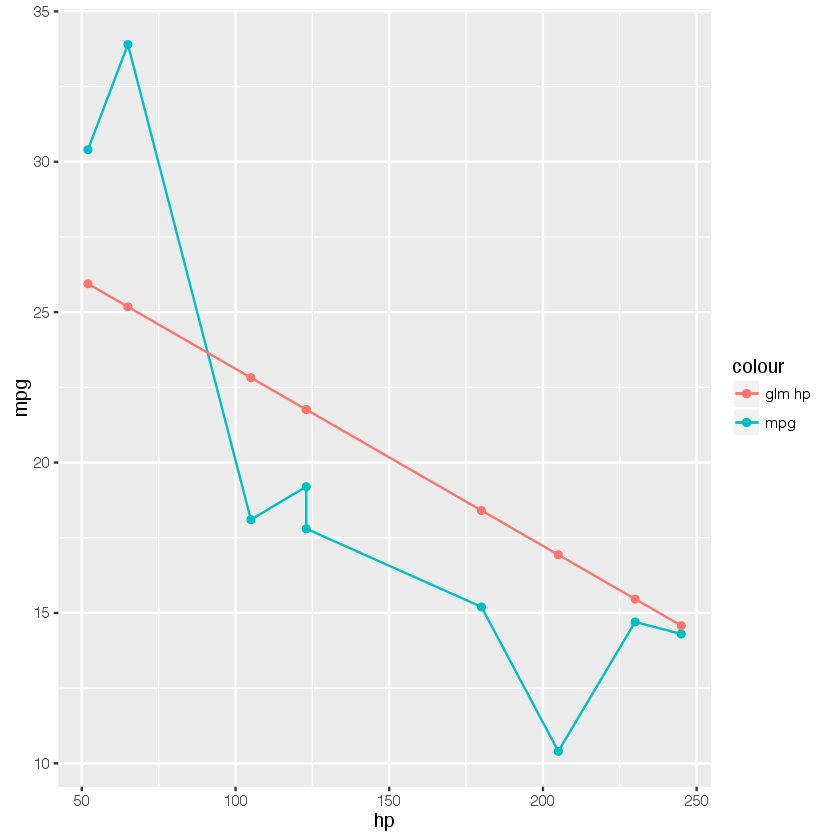

In [24]:
library(ggplot2)
graph <- qplot(hp, mpg, data = test, color = "mpg", geom = c('point', 'line')) + 
geom_point(aes(hp, predicted, color = 'glm hp')) + 
geom_line(aes(hp, predicted, color = "glm hp"))
graph

### Create a model with More Factors

In [25]:
model2 <- lm(mpg ~ hp + disp + wt, data = test)
model2
summary(model2)


Call:
lm(formula = mpg ~ hp + disp + wt, data = test)

Coefficients:
(Intercept)           hp         disp           wt  
   40.11444     -0.05256      0.01673     -4.88280  



Call:
lm(formula = mpg ~ hp + disp + wt, data = test)

Residuals:
           Valiant         Duster 360           Merc 280          Merc 280C 
           -3.3656            -1.5290            -0.4570            -1.8570 
       Merc 450SLC Cadillac Fleetwood  Chrysler Imperial        Honda Civic 
           -1.6112            -1.2018             5.4113            -0.3622 
    Toyota Corolla 
            4.9722 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 40.11444    5.83406   6.876 0.000995 ***
hp          -0.05256    0.05049  -1.041 0.345626    
disp         0.01673    0.03611   0.463 0.662626    
wt          -4.88280    2.93977  -1.661 0.157616    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.886 on 5 degrees of freedom
Multiple R-squared:  0.8434,	Adjusted R-squared:  0.7495 
F-statistic: 8.979 on 3 and 5 DF,  p-value: 0.01862


### Predict with multiple factor model
* Predict the results
* Compare predictions against actuals
* Calculate RMSE

In [26]:
test$predicted2 <- predict(model2, test)
test[, c('mpg', 'predicted2')]
rmse(test$predicted2, test$mpg)

,mpg,predicted2
Valiant,18.10000,21.46556
Duster 360,14.30000,15.82897
Merc 280,19.20000,19.65695
Merc 280C,17.80000,19.65695
Merc 450SLC,15.20000,16.81116
Cadillac Fleetwood,10.40000,11.60179
Chrysler Imperial,14.700000,9.288675
Honda Civic,30.40000,30.76217
Toyota Corolla,33.90000,28.92777


[1] 2.896333

### Graph with Actuals, HP model, and Multi-factor model

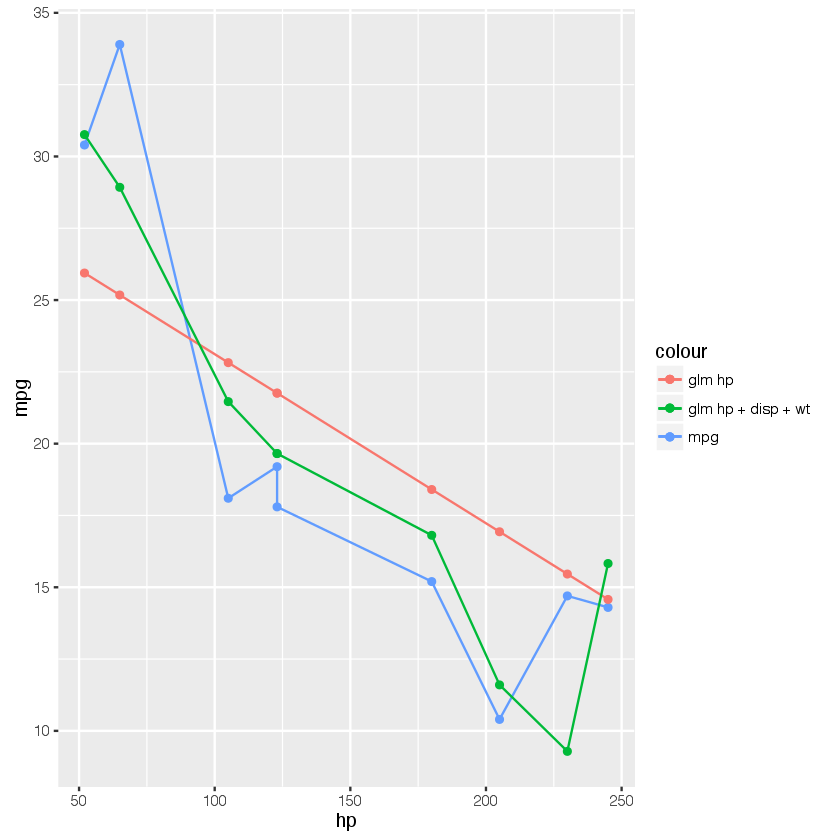

In [27]:
graph2 <- graph + 
geom_point(aes(hp, predicted2, color = 'glm hp + disp + wt'), data = test) + 
geom_line(aes(hp, predicted2, color = "glm hp + disp + wt"), data = test)

graph2

### Train with caret wrapper

In [40]:
trc <- trainControl(method = "cv", number = 2, p = .6)

model3 <- train(mpg ~ hp * wt,  # note the * operator, does cross product as well
                data = train,
                preProcess = c('center','scale'),
                method = "lm",
                trControl = trc)
model3
summary(model3)

Linear Regression 

23 samples
10 predictors

Pre-processing: centered (3), scaled (3) 
Resampling: Cross-Validated (2 fold) 
Summary of sample sizes: 12, 11 
Resampling results:

  RMSE      Rsquared 
  2.835461  0.7379647

 


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0332 -1.6493 -0.2011  1.3169  4.9947 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.3870     0.4742  42.992  < 2e-16 ***
hp           -6.6412     2.7841  -2.385  0.02763 *  
wt           -5.9290     1.6591  -3.574  0.00203 ** 
`hp:wt`       6.5173     3.8805   1.680  0.10942    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.274 on 19 degrees of freedom
Multiple R-squared:  0.8456,	Adjusted R-squared:  0.8213 
F-statistic:  34.7 on 3 and 19 DF,  p-value: 6.549e-08


### Predict with caret model

In [39]:
test$predicted3 <- predict(model3, test)
test[, c('mpg', 'predicted3')]
rmse(test$predicted3, test$mpg)

,mpg,predicted3
Valiant,18.10000,20.18384
Duster 360,14.30000,15.55917
Merc 280,19.20000,19.72448
Merc 280C,17.80000,19.72448
Merc 450SLC,15.20000,16.67221
Cadillac Fleetwood,10.40000,10.10138
Chrysler Imperial,14.700000,8.977052
Honda Civic,30.40000,29.07787
Toyota Corolla,33.90000,27.81745


[1] 3.048875

### Add to graph

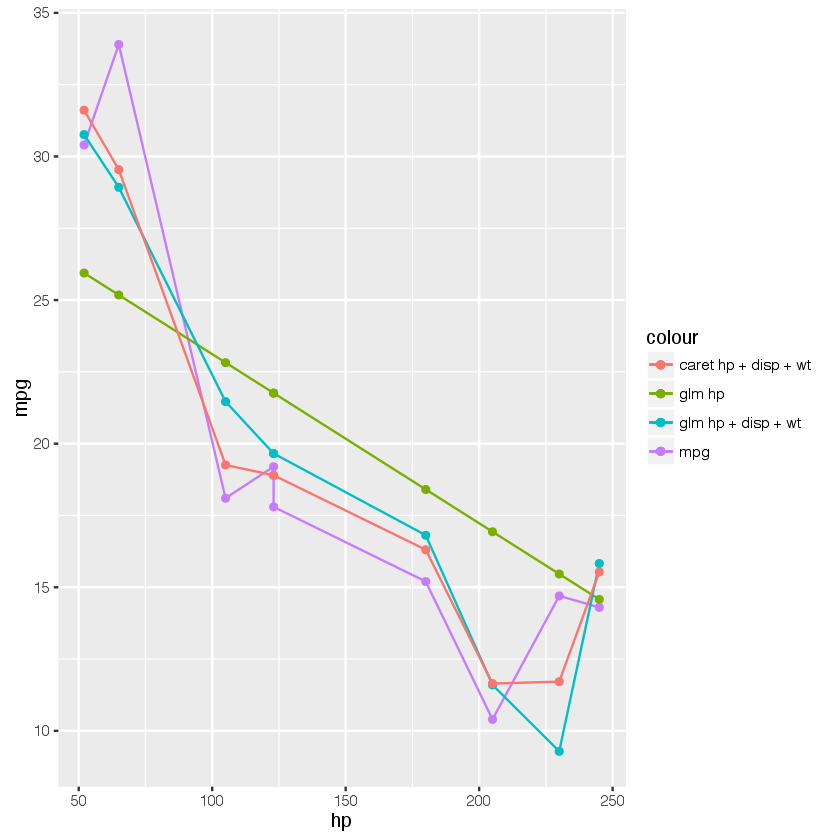

In [36]:
graph3 <- graph2 + 
geom_point(aes(hp, predicted3, color = 'caret hp + disp + wt'), data = test) + 
geom_line(aes(hp, predicted3, color = "caret hp + disp + wt"), data = test)

graph3